<a href="https://colab.research.google.com/github/salzabyla05/Prediksi-Penyakit-Jantung-Koroner/blob/main/PREDIKSI_DINI_PENYAKIT_JANTUNG_KORONER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Attempt to read the Excel file again
import pandas as pd
Jantung = pd.read_excel("/content/drive/MyDrive/Skripsi/SKRIPSI BISMILLAH/dataset/heart_revisi 1.xlsx")
Jantung.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.03,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.05,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.04,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.08,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.06,2,0,2,1


In [ ]:
Jantung.shape

(297, 14)

Setelah melihat hasilnya, ternyata data yang akan digunakan yaitu sebanyak 297 baris dan 14 kolom.

Sebelum melakukan analisis, terlebih dahulu digunakan fungsi “ .info ” untuk menampilkan informasi data yang akan dilakukan analisis.

In [ ]:
Jantung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Data yang akan dianalisis memiliki 14 variabel (kolom) yaitu kolom age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, slope, ca, dan thal yang memiliki type data integer dan kolom oldpeak dengan type data float.

PRE PROCESSING DATA

In [ ]:
# Untuk melakukan pengecekan apakah terdapat deret data yang kosong
Jantung.empty

False

In [ ]:
# Untuk mengetahui berapa bayak data yang duplikat
Jantung.duplicated().value_counts()

False    297
Name: count, dtype: int64

In [ ]:
# Untuk menghitung korelasi
Jantung.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092177,-0.056332,0.289100,0.200684,0.120918,-0.107267,-0.393603,0.089316,0.175040,-0.158687,0.339667,0.062173,-0.219393
sex,-0.092177,1.000000,-0.047894,-0.057592,-0.192924,0.042146,-0.074425,-0.057182,0.138950,0.092104,-0.030157,0.102632,0.223395,-0.287036
cp,-0.056332,-0.047894,1.000000,0.040750,-0.070841,0.108304,0.045122,0.294717,-0.383679,-0.169053,0.104518,-0.229861,-0.174008,0.428997
trestbps,0.289100,-0.057592,0.040750,1.000000,0.124085,0.181269,-0.115082,-0.055990,0.077518,0.195837,-0.128824,0.091321,0.053355,-0.146399
chol,0.200684,-0.192924,-0.070841,0.124085,1.000000,0.013619,-0.140792,-0.004616,0.067663,0.029815,0.004790,0.106317,0.073998,-0.075302
fbs,0.120918,0.042146,0.108304,0.181269,0.013619,1.000000,-0.089462,-0.010520,0.012725,0.015370,-0.051240,0.165737,-0.013287,-0.013379
restecg,-0.107267,-0.074425,0.045122,-0.115082,-0.140792,-0.089462,1.000000,0.033367,-0.076780,-0.054118,0.092844,-0.105649,-0.002077,0.134861
thalach,-0.393603,-0.057182,0.294717,-0.055990,-0.004616,-0.010520,0.033367,1.000000,-0.379785,-0.331128,0.387710,-0.266433,-0.122647,0.429971
exang,0.089316,0.138950,-0.383679,0.077518,0.067663,0.012725,-0.076780,-0.379785,1.000000,0.268731,-0.247000,0.152839,0.238902,-0.435758
oldpeak,0.175040,0.092104,-0.169053,0.195837,0.029815,0.015370,-0.054118,-0.331128,0.268731,1.000000,-0.555239,0.270679,0.203674,-0.422087


In [ ]:
# Statistik deskriptif data
Jantung.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.488215,0.680135,0.959596,131.656566,247.218855,0.148148,0.521886,149.599327,0.326599,0.802189,1.393939,0.703704,2.336700,0.538721
std,9.069962,0.467211,1.032439,17.656154,51.843735,0.355846,0.526679,22.896456,0.469761,1.083251,0.617616,0.975937,0.582196,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,152.000000,0.000000,0.080000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.060000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.020000,2.000000,4.000000,3.000000,1.000000


<Axes: >

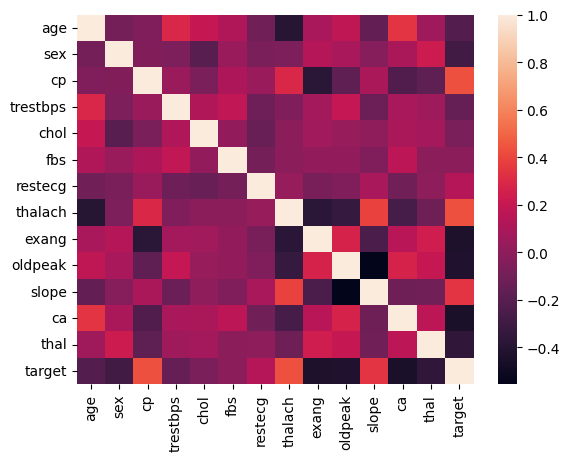

In [ ]:
corr = Jantung.select_dtypes('number').corr()
sns.heatmap(corr)

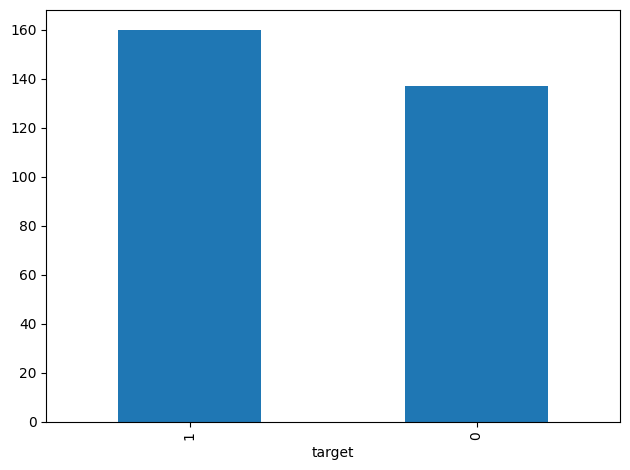

In [ ]:
# Untuk melihat banyak data yang terkena penyakit jantung atau tidak
Jantung['target'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

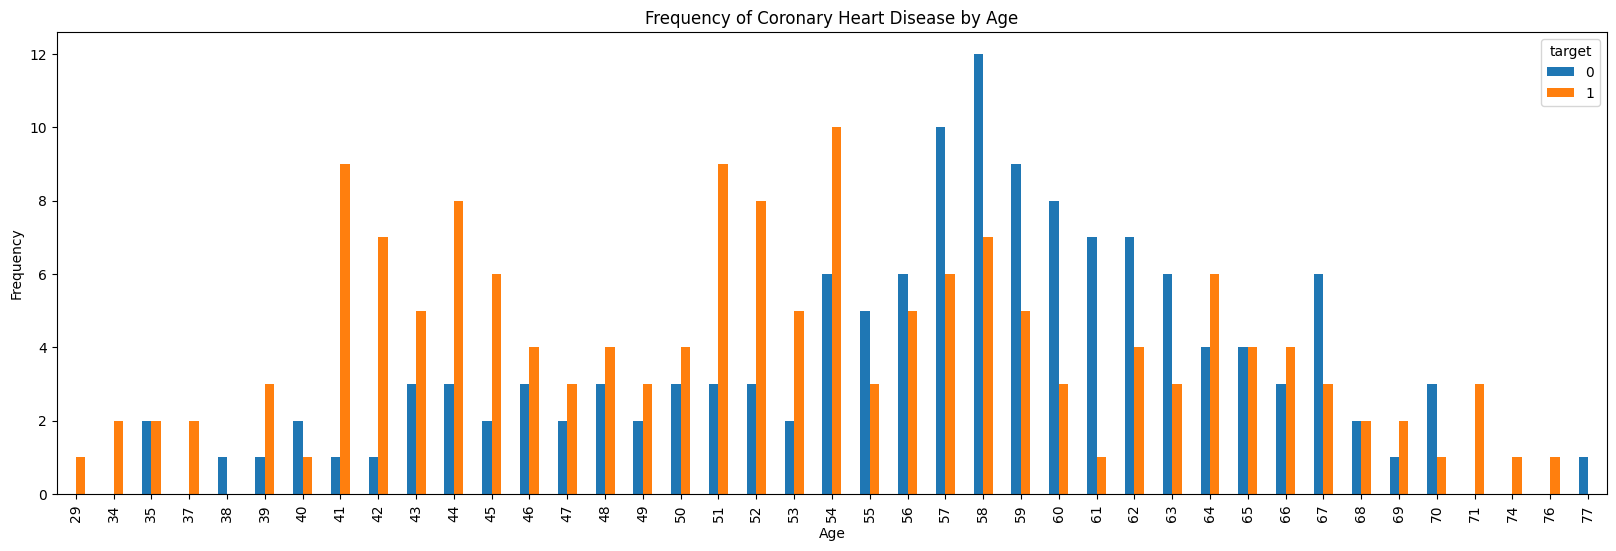

In [ ]:
pd.crosstab(Jantung.age,Jantung.target).plot(kind="bar",figsize=(20,6))
plt.title('Frequency of Coronary Heart Disease by Age') #INGGRIS
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

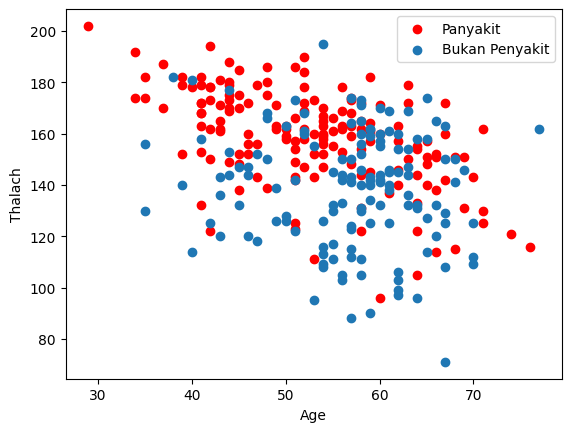

In [ ]:
plt.scatter(x=Jantung.age[Jantung.target==1], y=Jantung.thalach[(Jantung.target==1)], c="red")
plt.scatter(x=Jantung.age[Jantung.target==0], y=Jantung.thalach[(Jantung.target==0)])
plt.legend(["Panyakit", "Bukan Penyakit"])
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.show()

Variabel Independen dan Variabel Dependen

Tahapan selanjutnya yaitu menentukan variabel independen dan variabel dependen dari data yang akan dianalisis. Berikut script yang digunakan.

In [ ]:
X = Jantung.drop(columns='target')
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.03,0,0,1
1,37,1,2,130,250,0,1,187,0,3.05,0,0,2
2,41,0,1,130,204,0,0,172,0,1.04,2,0,2
3,56,1,1,120,236,0,1,178,0,0.08,2,0,2
4,57,0,0,120,354,0,1,163,1,0.06,2,0,2


Kolom target di drop atau di hapus dari data frame karena akan menjadi variabel dependen.

In [ ]:
y = Jantung['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

**Train Test Split**

Pertama dilakukan Train Test Split untuk membagi dataset menjadi training set dan test set.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=123)

Script di atas membagi dataset menjadi 80% training set dan 20% test set. Yang artinya dari 297 data, training berisi 237 data dan test set berisi 60 data.

In [ ]:
# check dimensi array dari masing-masing variable
print('X_train2 = ', X_train2.shape)
print('X_test2 = ', X_test2.shape)
print('y_train2 = ', y_train2.shape)
print('y_test2 = ', y_test2.shape)

X_train2 =  (237, 13)
X_test2 =  (60, 13)
y_train2 =  (237,)
y_test2 =  (60,)


**Prediksi pada Training Set dan Test Set**

In [ ]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
classifier = GaussianNB()

untuk menampilkan fitting model dengan training data dan target

In [ ]:
# Memasukkan data training pada fungsi klasifikasi naive bayes
classifier = classifier.fit(X_train2, y_train2)

In [ ]:
# Menentukan hasil prediksi dari x_test2
predicted = classifier.predict(X_test2)

In [ ]:
print(classifier.score(X_test2, y_test2))

0.8833333333333333


In [ ]:
# import confusion_matrix model
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
classifier.fit(X_train2.values, y_train2.values)
y_pred2 = classifier.predict(X_test2.values) #memprediksi hasil set Uji coba

In [ ]:
#import confusion_matrix model
confusion_matrix(y_test2, y_pred2)
print(confusion_matrix(y_test2, y_pred2))

[[22  3]
 [ 4 31]]


In [ ]:
y_true = y_test2
y_pred2 = predicted

print(accuracy_score(y_true, y_pred2))

0.8833333333333333


menghasilkan peforma akurasi sebesar 0.883 atau 88%

In [ ]:
#menghitung nilai akurasi dari klasifikasi naive bayes
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.91      0.89      0.90        35

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



Kesimpulan
Kesimpulan yang dapat diambil dengan menggunakan model Naive Bayes, berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai akurasi, presisi dan recall. Dari 100% dataset yang digunakan dibagi menjadi 80% sebagai data latih (training data) dan 20% sebagai data uji (testing data). Hasil akurasi yang didapatkan pada percobaan ini sebesar 0.8833333333333333 atau 88%.

In [ ]:
#memasukkan data pasien
Umur_pasien = float(input("Masukkan umur pasien (Tahun): ")) #menginput umur pasien
Jenis_kelamin = float(input("Masukkan Jenis kelamin : ")) #menginput jenis kelamin 1 = laki-laki dan 0 = perempuan
cp = float(input("Masukkan cp: ")) #menginput  chest pain type
trestbps = float(input("Masukkan trestbps (mmHG): ")) #menginput  resting blood pressure (in mm Hg on admission to the hospital)
cholestoral = float(input("Masukkan cholestoral (mg/dl): ")) #menginput serum cholestoral in mg/dl
fbs = float(input("Masukkan fbs (mg/dl): ")) #menginput fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg = float(input("Masukkan restecg : ")) #menginput resting electrocardiographic results
thalach = float(input("Masukkan thalach : "))
exang = float(input("Masukkan exang : ")) #menginput exercise induced angina (1 = yes; 0 = no)
oldpeak = float(input("Masukkan oldpeak : ")) #menginput ST depression induced by exercise relative to rest
slope = float(input("Masukkan slope : ")) #menginput the slope of the peak exercise ST segment
ca = float(input("Masukkan ca : ")) #menginput number of major vessels (0-3) colored by flourosopy
thal = float(input("Masukkan thal : ")) #menginput thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

Masukkan umur pasien (Tahun): 60
Masukkan Jenis kelamin : 0
Masukkan cp: 3
Masukkan trestbps (mmHG): 150
Masukkan cholestoral (mg/dl): 240
Masukkan fbs (mg/dl): 0
Masukkan restecg : 1
Masukkan thalach : 171
Masukkan exang : 0
Masukkan oldpeak : 0
Masukkan slope : 2
Masukkan ca : 0
Masukkan thal : 2


In [ ]:
data_ukuran = [Umur_pasien,Jenis_kelamin,cp,trestbps, cholestoral, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

In [ ]:
new = np.array([data_ukuran]) #membuat array numpy baru yang berisi data ukuran
prediksi = classifier.predict(new) #memprediksi naive bayes dengan data pada X_new
print('Terkena jantung koroner atau tidak : ',prediksi) #mencetak hasil predict

if (prediksi[0]==0):
  print('Pasien Tidak Terkena Penyakit Jantung Koroner')
else:
  print('Pasien Terkena Penyakit Jantung Koroner')

Terkena jantung koroner atau tidak :  [1]
Pasien Terkena Penyakit Jantung Koroner
